In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tabulate import tabulate  #for tablular format

#For Recommendation System
from sklearn.cluster import KMeans
from tqdm import tqdm

#For Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

#The Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings("ignore")

#**FUNCTIONS**

###Data checking

In [261]:
def datacheck(data):

    print(f"Rows: {data.shape[0]}\tColumns: {data.shape[1]}")
    table_data = []

    for i in data.columns:
      table_data.append([i, len(data[i].unique()), data[i].isna().sum(), data[i].dtypes])
    print(tabulate(table_data, headers=["Column", "Total Unique Values", "Missing Values","Data Type"], tablefmt="fancy_grid"))

    return

###Donut Chart

In [262]:
def donut(value,label):

    colr=['#ff9999','#66b3ff','#99ff99','#ffcc99',"cyan", "silver", "red", "orange", "violet"]

    plt.pie(value, explode=(0.1, 0, 0, 0, 0, 0, 0, 0, 0), labels=label,
                    colors=['#ff9999','#66b3ff','#99ff99','#ffcc99',"cyan", "silver", "red","orange", "violet"], autopct='%1.1f%%', startangle=110,shadow=True)

    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    plt.axis('equal')
    plt.tight_layout()
    plt.title('Percentage Distribution of Total Employees \n')
    plt.show()

    return

###BAR GRAPH

In [263]:
#BAR GRAPH
def barvisual(a,b,alabel,blabel):

  plt.figure(figsize=(5, 4))
  custom_palette = sns.color_palette("husl")

  ax = sns.barplot(x=a, y=b, palette=custom_palette, alpha=0.5,  edgecolor='black', linewidth=0.5)

  # Showing values
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points', fontsize=7)

  plt.title(f"{alabel} vs {blabel}")
  plt.xlabel(alabel)
  plt.ylabel(blabel)
  plt.tick_params(axis='x', labelsize=8, rotation=85)
  plt.show()

  return

###COUNT GRAPH

In [264]:
#COUNT GRAPH
def countvisual(a,b,alabel,blabel):
    plt.figure(figsize=(12, 6))

    custom_palette = sns.color_palette("pastel")
    ax = sns.countplot(x=a, hue=b, palette=custom_palette, alpha=0.5,  edgecolor='black', linewidth=0.5)

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points', fontsize=7)

    plt.title(f"{alabel} vs {blabel}")
    plt.xlabel(alabel)
    plt.ylabel(blabel)
    plt.tick_params(axis='x', labelsize=8, rotation=85)
    plt.tight_layout()
    plt.show()
    return

###Correlation

In [265]:
def Correlaton(x):
  plt.subplots(figsize=(14, 12))
  dfa=x

  sns.heatmap(dfa.corr(), annot=True)
  plt.show()

  return

###ELBOW CURVE

In [266]:
def elbowcurve(x):
  plt.figure(figsize=(5, 4))
  wcss = []  #within-cluster sum of squares (for different values of k)

  for i in range(1, 11):  #For K = 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=99)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)  # WCSS in kmeans.inertia_


  plt.plot(range(1, 11), wcss, marker='o', color='red')  #From k = 1 to 10
  plt.title('Elbow Method')
  plt.xlabel('Number of Clusters')
  plt.ylabel('WCSS')
  plt.tight_layout()
  plt.show()
  return

###MODELS

In [267]:
def mod(model,x_train_std, x_test_std, y_train, y_test):

    print(f"Train accuracy: {model.score(x_train_std, y_train)} \nTest accuracy: {model.score(x_test_std, y_test)}\n")

    #classification_report
    y_pred = model.predict(x_test_std)
    print(classification_report(y_test, y_pred))

    print("\n")
    return


###Logstic Regression Feature Selection

In [268]:
def logistic_feature(mod):

    feat = pd.DataFrame({'Feature': X.columns, 'Importance': mod.coef_[0]})
    Top_feature = feat.reindex(feat['Importance'].abs().sort_values(ascending=False).index)  #Sorting absolute values of the scores

    print('Feature selection by logistic regression:')
    print(Top_feature.head(10))
    return

###Other model Feature Selection

In [269]:
def models_feature(mod):
    feat = pd.DataFrame({'Feature': X.columns, 'Importance': mod.feature_importances_})   #feature importances in the models
    Top_feature = feat.sort_values(by='Importance', ascending=False)

    print ('Feature selections:')
    print(Top_feature.head(10))
    return

#**DATASET**

In [270]:
df = pd.read_csv('/content/drive/MyDrive/Python/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [271]:
datacheck(df)

Rows: 1470	Columns: 35
╒══════════════════════════╤═══════════════════════╤══════════════════╤═════════════╕
│ Column                   │   Total Unique Values │   Missing Values │ Data Type   │
╞══════════════════════════╪═══════════════════════╪══════════════════╪═════════════╡
│ Age                      │                    43 │                0 │ int64       │
├──────────────────────────┼───────────────────────┼──────────────────┼─────────────┤
│ Attrition                │                     2 │                0 │ object      │
├──────────────────────────┼───────────────────────┼──────────────────┼─────────────┤
│ BusinessTravel           │                     3 │                0 │ object      │
├──────────────────────────┼───────────────────────┼──────────────────┼─────────────┤
│ DailyRate                │                   886 │                0 │ int64       │
├──────────────────────────┼───────────────────────┼──────────────────┼─────────────┤
│ Department               │   

Removing these columns:  
- BusinessTravel  
- DailyRate  
- DistanceFromHome  
- Education  
- EmployeeCount  
- HourlyRate  
- JobInvolvement  
- MonthlyRate  
- Over18  
- StandardHours  

In [272]:
df=df.drop(columns=["Age","BusinessTravel", "DailyRate", "Gender", "MaritalStatus", "DistanceFromHome", "Education", "EmployeeCount", "HourlyRate", "JobInvolvement", "MonthlyRate", "Over18", "StandardHours"])

In [273]:
df['Attrition'] = df['Attrition'].replace({'Yes': 1, 'No': 0})
df['OverTime'] = df['OverTime'].replace({'Yes': 1, 'No': 0})

df["JobRole"].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

#**Graphs**

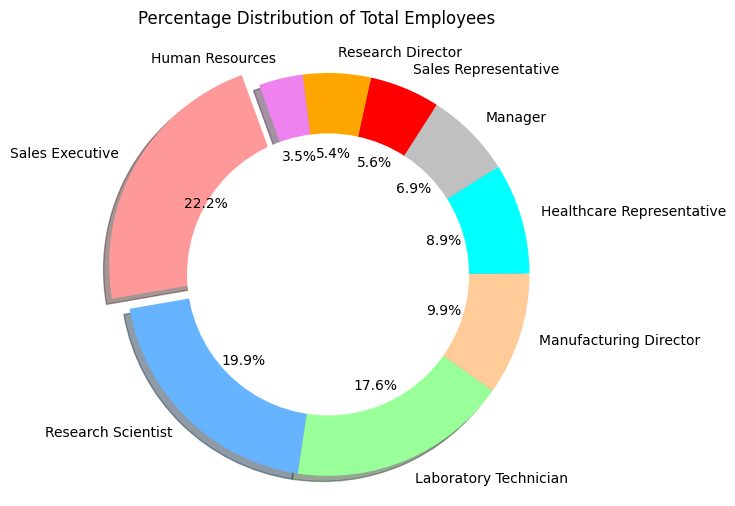

In [259]:
donut(df['JobRole'].value_counts(),df["JobRole"].unique())

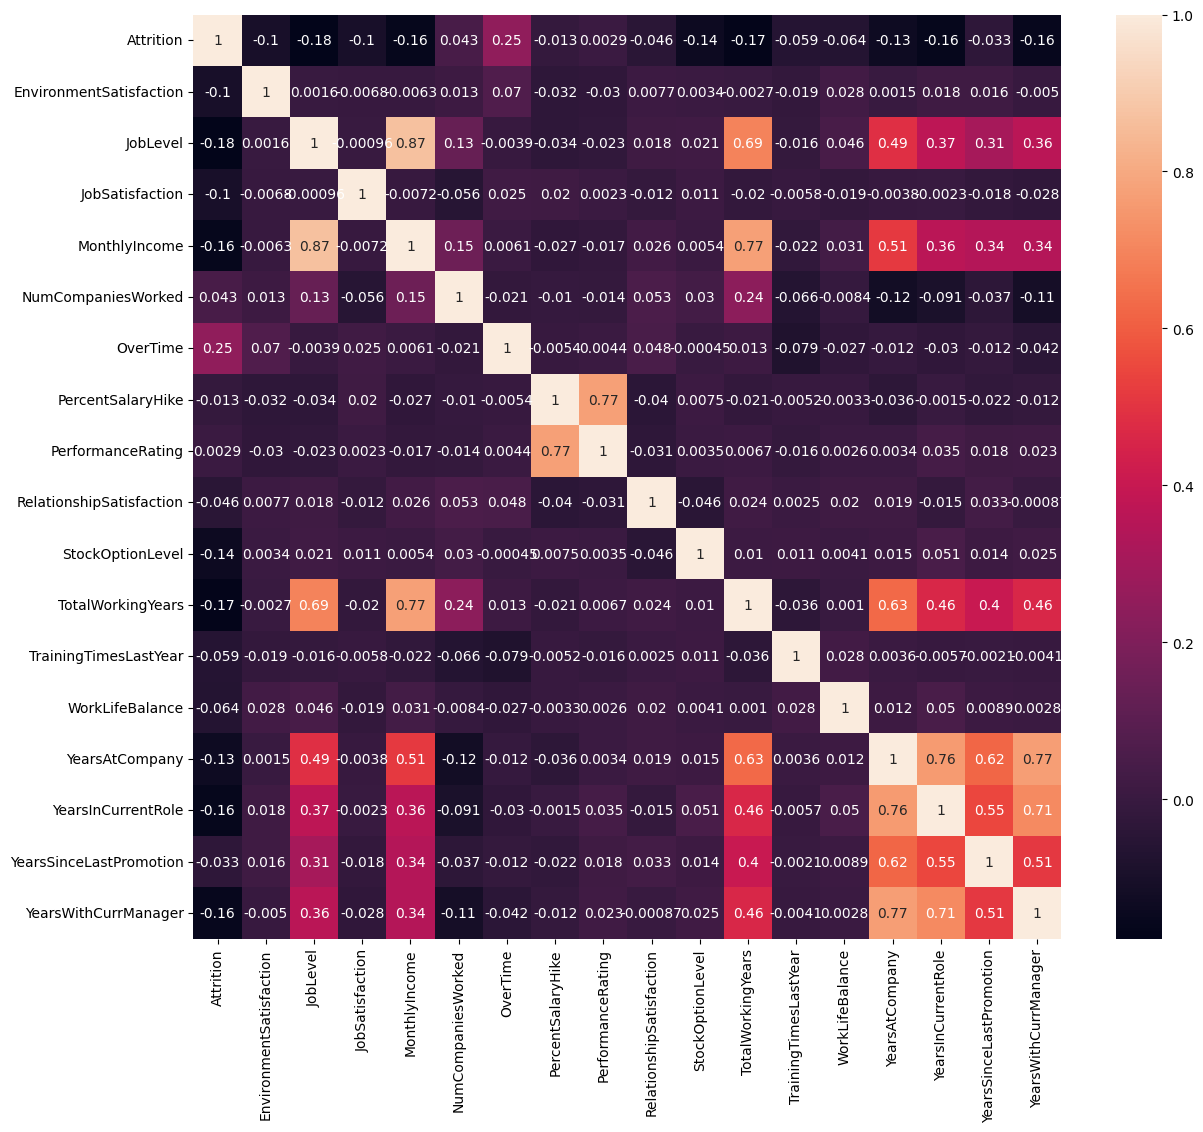

In [237]:
Correlaton(df[['Attrition', 'EnvironmentSatisfaction', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']])

**Job Level** and **Monthly Income** got a ***0.87*** point of correlation

For **Attrition**, we got a ***0.25*** point of correlation with **Ovetime**

In [216]:
jbrole = df.groupby(by='JobRole')['MonthlyIncome'].mean().reset_index()
jbrolemed = df.groupby(by='JobRole')['MonthlyIncome'].median().reset_index()

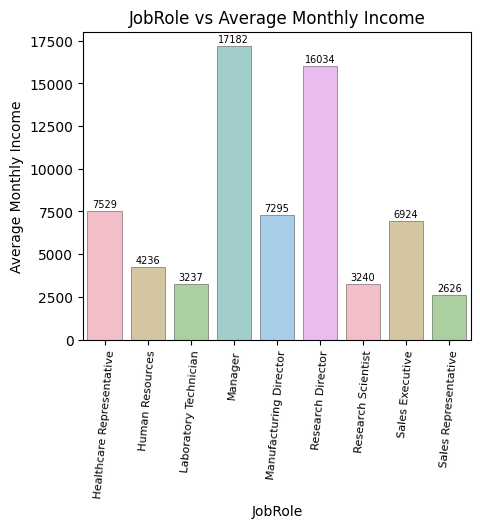

In [234]:
barvisual(jbrole['JobRole'],jbrole['MonthlyIncome'],'JobRole','Average Monthly Income')

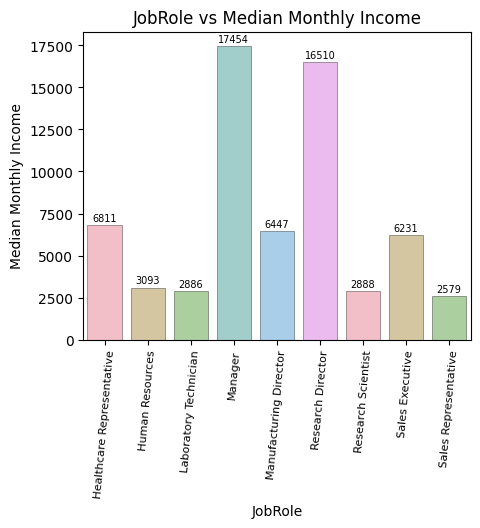

In [235]:
barvisual(jbrolemed['JobRole'],jbrolemed['MonthlyIncome'],'JobRole','Median Monthly Income')

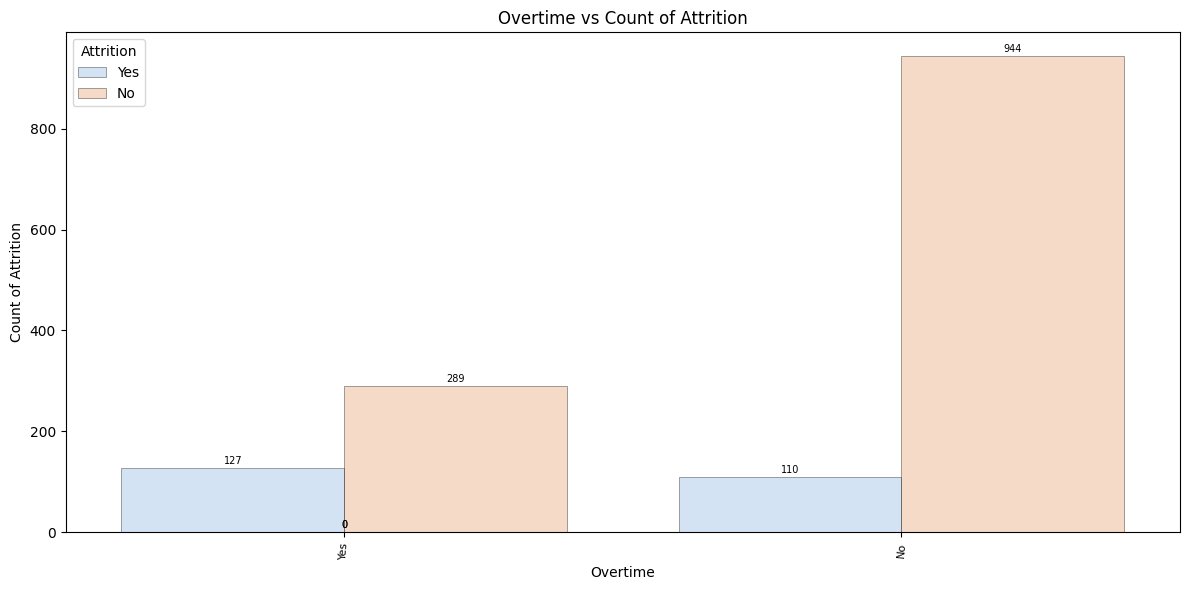

In [218]:
countvisual(df['OverTime'],df['Attrition'],'Overtime','Count of Attrition')
# 0=> NO    1=> YES

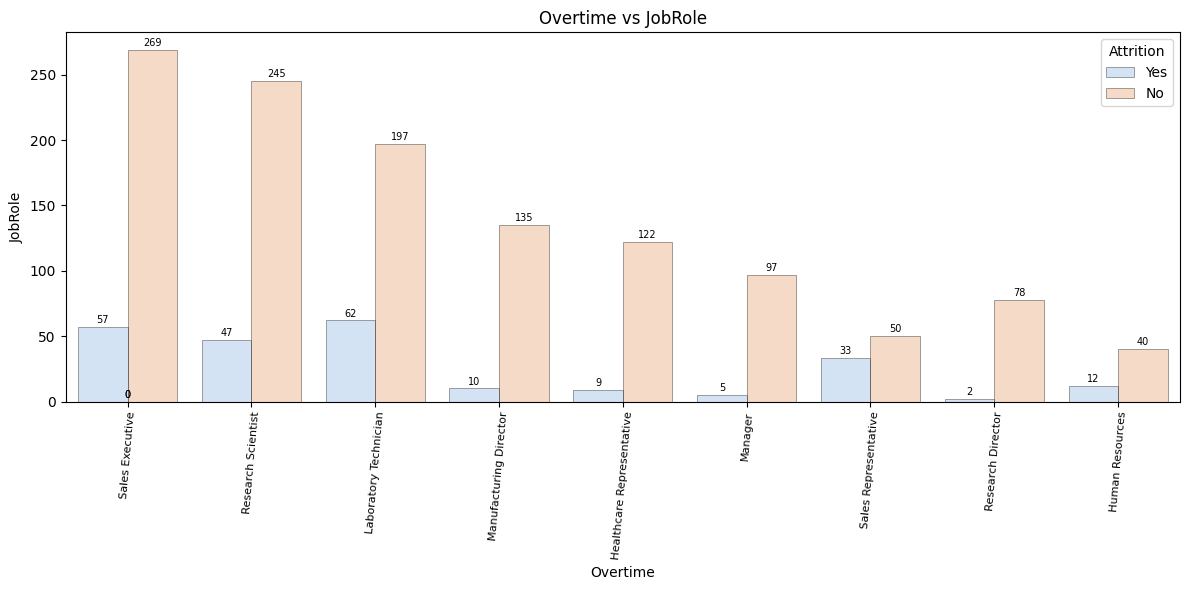

In [219]:
countvisual(df['JobRole'],df['Attrition'],'Overtime','JobRole')
# 0=> NO    1=> YES

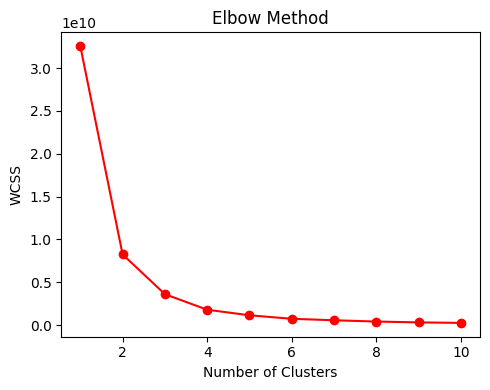

In [238]:
#ELBOW CURVE FOR K MEANS

elbowcurve(df[['Attrition', 'EnvironmentSatisfaction', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']])

It seems it's preffered we take k =3

#**DUMMY, SCALING, SPLITING **

Checking the numerical and categorical columns

In [274]:
num_types = [ 'int64', 'float64']
xy = df.select_dtypes(include=num_types)    #Selecting only numeric columns
non_numeric_columns = df.select_dtypes(exclude=num_types).columns   #Selecting the categorical columns
non_numeric_columns

Index(['Department', 'EducationField', 'JobRole'], dtype='object')

Dummy for categorical

In [275]:
df_encoded = pd.get_dummies(df,columns=non_numeric_columns)
df_encoded

,Attrition,EmployeeNumber,EnvironmentSatisfaction,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,...,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,1,1,2,3,4,5993,8,1,11,3,...,False,False,False,False,False,False,False,False,True,False
1,0,2,3,2,2,5130,1,0,23,4,...,False,False,False,False,False,False,False,True,False,False
2,1,4,4,1,3,2090,6,1,15,3,...,False,False,False,True,False,False,False,False,False,False
3,0,5,4,1,3,2909,1,1,11,3,...,False,False,False,False,False,False,False,True,False,False
4,0,7,1,1,2,3468,9,0,12,3,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,2061,3,2,4,2571,4,0,17,3,...,False,False,False,True,False,False,False,False,False,False
1466,0,2062,4,3,1,9991,4,0,15,3,...,False,True,False,False,False,False,False,False,False,False
1467,0,2064,2,3,2,6142,1,1,20,4,...,False,False,False,False,False,True,False,False,False,False
1468,0,2065,4,3,2,5390,2,0,14,3,...,False,False,False,False,False,False,False,False,True,False


###80:20 Training : Test

In [276]:
X = df_encoded.drop(columns=['Attrition'])
y = df_encoded['Attrition']

x_train, x_test, y_train, y_test = train_test_split(X,y, shuffle=True, stratify=y, test_size=0.2, random_state=99)

###STANDARD SCALER

In [277]:
scaler = StandardScaler()

In [278]:
#For Models
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

In [279]:
#For Recommendation System
xy = scaler.fit_transform(xy)

#MODELS

###LOGISTIC REGRESSION

In [280]:
logi = LogisticRegression()
logi.fit(x_train_std, y_train)

LogisticRegression()

In [281]:
mod(logi,x_train_std, x_test_std, y_train, y_test)

Train accuracy: 0.875 
Test accuracy: 0.8469387755102041

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       247
           1       0.54      0.30      0.38        47

    accuracy                           0.85       294
   macro avg       0.71      0.62      0.65       294
weighted avg       0.82      0.85      0.83       294





###Decision Tree

In [282]:
tree = DecisionTreeClassifier(random_state=99,max_depth = 5)
tree.fit(x_train_std, y_train)

DecisionTreeClassifier(max_depth=5, random_state=99)

In [283]:
mod(tree,x_train_std, x_test_std, y_train, y_test)

Train accuracy: 0.9022108843537415 
Test accuracy: 0.8231292517006803

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       247
           1       0.40      0.21      0.28        47

    accuracy                           0.82       294
   macro avg       0.63      0.58      0.59       294
weighted avg       0.79      0.82      0.80       294





###Random Forest

In [284]:
ranfor = RandomForestClassifier(ccp_alpha = 0.001, max_depth = 9, n_estimators = 500, min_samples_split = 10, random_state = 999)
ranfor.fit(x_train_std, y_train)

RandomForestClassifier(ccp_alpha=0.001, max_depth=9, min_samples_split=10,
                       n_estimators=500, random_state=999)

In [285]:
mod(ranfor,x_train_std, x_test_std, y_train, y_test)

Train accuracy: 0.9098639455782312 
Test accuracy: 0.8571428571428571

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       247
           1       0.86      0.13      0.22        47

    accuracy                           0.86       294
   macro avg       0.86      0.56      0.57       294
weighted avg       0.86      0.86      0.81       294





Neural Network

In [286]:
nnmodel = MLPClassifier(hidden_layer_sizes=(5,), activation='identity', alpha =0.0001)
nnmodel.fit(x_train_std, y_train)

MLPClassifier(activation='identity', hidden_layer_sizes=(5,))

In [287]:
mod(nnmodel,x_train_std, x_test_std, y_train, y_test)

Train accuracy: 0.8741496598639455 
Test accuracy: 0.8537414965986394

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.58      0.32      0.41        47

    accuracy                           0.85       294
   macro avg       0.73      0.64      0.66       294
weighted avg       0.83      0.85      0.84       294





We find Logistic Regression and Neural Network both performed well and have quite similar values. The second best is Random Forest

#Feature selection

For Logistic Regression

In [290]:
logistic_feature(logi)

Feature selection by logistic regression:
                    Feature  Importance
6                  OverTime    0.902992
14           YearsAtCompany    0.735036
16  YearsSinceLastPromotion    0.615841
11        TotalWorkingYears   -0.565020
17     YearsWithCurrManager   -0.554500
15       YearsInCurrentRole   -0.524185
2                  JobLevel   -0.488559
10         StockOptionLevel   -0.484920
1   EnvironmentSatisfaction   -0.459637
3           JobSatisfaction   -0.400173


For Random Forest

In [291]:
models_feature(ranfor)

Feature selections:
                    Feature  Importance
6                  OverTime    0.112928
4             MonthlyIncome    0.110317
11        TotalWorkingYears    0.078427
0            EmployeeNumber    0.060429
14           YearsAtCompany    0.058644
10         StockOptionLevel    0.055983
17     YearsWithCurrManager    0.046407
1   EnvironmentSatisfaction    0.041319
5        NumCompaniesWorked    0.041213
7         PercentSalaryHike    0.039244


For Decision Trees

In [292]:
models_feature(tree)

Feature selections:
                       Feature  Importance
4                MonthlyIncome    0.275470
6                     OverTime    0.163700
11           TotalWorkingYears    0.084283
10            StockOptionLevel    0.074776
20            Department_Sales    0.065310
1      EnvironmentSatisfaction    0.064951
33  JobRole_Research Scientist    0.038489
17        YearsWithCurrManager    0.036778
7            PercentSalaryHike    0.032116
13             WorkLifeBalance    0.026421


#**RECOMMENDATION SYSTEM**

In [244]:
#CLUSTERS
n_clusters=3   #Taking k =3

km = KMeans(n_clusters)
k=km.fit_predict(xy)
df['no']=k   #New column displaying the clusters created

In [245]:
class Recommend():
    def __init__(self, rec_data):
        self.rec_data_ = rec_data

    def change_data(self, rec_data):
        self.rec_data_ = rec_data

    def get_recomm(self, JobRole, JobLevel, amount=3):
        distances = []

        filtered_data = self.rec_data_[(self.rec_data_.JobRole.str.lower() == JobRole.lower()) &
                                       (self.rec_data_.JobLevel == JobLevel) &
                                       (self.rec_data_.Attrition == 0)]       # Added condition for Attrition = NO


        if filtered_data.empty:
            print(f"No data found for JobRole '{JobRole}' and JobLevel '{JobLevel}' and Department '{Department}'.")
            return pd.DataFrame()
        # Return an empty DataFrame if no data is found

        topone = filtered_data.head(1).values[0]      #topmost recommendation row

        # For the ones that doesn't match with our criteria
        res_data = self.rec_data_[(self.rec_data_.JobRole.str.lower() != JobRole.lower()) |
                                  (self.rec_data_.JobLevel != JobLevel) ]



        for i in tqdm(res_data.values, desc="Calculating distances"):
            dist = 0
            for col in np.arange(len(res_data.columns)):
                if not col in [1, 2,6, 23]:          #indeces of non-numerical columns
                    dist = dist + np.absolute(float(topone[col]) - float(i[col]))     #Manhettan distances by  topmost one and current row
            distances.append(dist)


        res_data['distance'] = distances
        res_data = res_data.sort_values('distance')
        columns = ['Attrition','EmployeeNumber', 'JobRole', 'JobLevel', 'Department']


        return res_data[columns][:amount]

In [246]:
recommender = Recommend(df)

In [247]:
recommender.get_recomm('Research Scientist',1)

Calculating distances: 100%|██████████| 1236/1236 [00:00<00:00, 9965.44it/s] 


,Attrition,EmployeeNumber,JobRole,JobLevel,Department
17,0,22,Laboratory Technician,1,Research & Development
5,0,8,Laboratory Technician,1,Research & Development
102,1,137,Laboratory Technician,1,Research & Development


In [248]:
recommender.get_recomm('Research Director', 5)

Calculating distances: 100%|██████████| 1444/1444 [00:00<00:00, 20478.14it/s]


,Attrition,EmployeeNumber,JobRole,JobLevel,Department
105,0,140,Manager,5,Human Resources
29,0,38,Manager,5,Sales
25,0,32,Manager,5,Research & Development


In [257]:
recommender.get_recomm('Research Scientist', 2)

Calculating distances: 100%|██████████| 1413/1413 [00:00<00:00, 5812.19it/s]


,Attrition,EmployeeNumber,JobRole,JobLevel,Department
80,0,104,Laboratory Technician,2,Research & Development
9,0,13,Healthcare Representative,2,Research & Development
104,0,139,Healthcare Representative,2,Research & Development
